<font size="5">**Chess Openings: The Secret to Chess?**</font>

For centuries, chess has been entertaining and competitive and is now at the pinnacle of its popularity with the emergence of new technology and social media.

That being said, as technology & tactics continue to evolve it is important to advance as well; chess openings provide the player with a strong tactical start to every game, and through this data analysis and visualization we will answer a plethora of questions such as:

Does white or black win more often? What openings are the best to play for both white and black? Do certain openings have different chances of winning based off of the opponents opening? 

But what is a chess opening? A Chess Opening is the name for the first 2-4 moves for both sides, the opening/beginning of play.

Through this data story we will be exploring the secrets to chess openings, the data behind inherent advantages, and how to improve at any level of chess!


*The dataset I am using is high_elo_opening, which compiles over 1,750 chess openings, with corresponding data included as well. The citation below was formatted from https://www.kaggle.com/general/46091*

MÖBIUS. (2020, December). High-Elo Games Chess Opening Dataset, Version 3. Retrieved January 28 2023 from https://www.kaggle.com/datasets/arashnic/chess-opening-dataset

In [22]:
#First: Import libraries!

import numpy as np              
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
#Import high_elo_opening dataset

df = pd.read_csv('high_elo_opening.csv')
df.head()

,opening_name,side,num_games,ECO,last_played_date,perf_rating,avg_player,perc_player_win,perc_draw,pec_opponent_win,...,move2b,move3w,move3b,move4w,move4b,perc_white_win,perc_black_win,white_odds,white_wins,black_wins
0,"Alekhine Defense, Balogh Variation",white,692,B03,6/22/2018,2247,2225,40.8,24.3,35.0,...,Nd5,d4,d6,Bc4,NaN,40.8,35.0,1.165714,282.336,242.200
1,"Alekhine Defense, Brooklyn Variation",black,228,B02,6/27/2018,2145,2193,29.8,22.4,47.8,...,Ng8,NaN,NaN,NaN,NaN,47.8,29.8,1.604027,108.984,67.944
2,"Alekhine Defense, Exchange Variation",white,6485,B03,7/6/2018,2244,2194,40.8,27.7,31.5,...,Nd5,d4,d6,c4,Nb6,40.8,31.5,1.295238,2645.880,2042.775
3,"Alekhine Defense, Four Pawns Attack",white,881,B03,6/20/2018,2187,2130,39.7,23.2,37.1,...,Nd5,d4,d6,c4,Nb6,39.7,37.1,1.070081,349.757,326.851
4,"Alekhine Defense, Four Pawns Attack, Fianchett...",black,259,B03,5/20/2018,2122,2178,37.8,21.2,40.9,...,Nd5,d4,d6,c4,Nb6,40.9,37.8,1.082011,105.931,97.902


<font size="5">**high_elo_opening Data Dictionary**</font>

(1) opening_name: Opening name & variation

(2) side: Player color (white or black) 

(3) num_games: Number of games each opening had been played in the dataset 

(4) ECO: Unique code for specific opening

(5) perf_rating: Highest rating the opening was played at in the dataset 

(6) avg_player: Average rating the opening was played at in the dataset 

(7) perc_player_win: Average player win percentage when playing the opening 

(8) perc_draw: Average draw percentage when playing the opening 

(9) perc_opponent_win: Average opponent win percentage when playing against the opening 

(10) move2b: Second move in the opening 

(11) move3b: Third move in the opening 

(12) move4w: Fourth move in the opening 

(13) perc_white_win: Percentage white wins when playing the opening 

(14) perc_black_win: Percentage black wins when playing the opening 

(15) white_odds: Odds white wins when playing the opening 

(16) black_odds: Odds black wins when playing the opening 

(17) white_wins: Total amount of wins for white when playing the opening 

(18) black_wins: Total amount of wins for black when playing the opening 

(19) opening_move: Opening, without the 4-move variation, statistical evidence is still accurate. (added this column using python, thanks Dmitriy!)


In [24]:
#Let's check our count
df.count()

opening_name        1884
side                1884
num_games           1884
ECO                 1884
last_played_date    1884
perf_rating         1884
avg_player          1884
perc_player_win     1884
perc_draw           1884
pec_opponent_win    1884
moves_list          1884
move1w              1884
move1b              1869
move2w              1814
move2b              1744
move3w              1628
move3b              1501
move4w              1340
move4b              1186
perc_white_win      1884
perc_black_win      1884
white_odds          1884
white_wins          1884
black_wins          1884
dtype: int64

The data missing in the count is for the 2nd, 3rd, and 4th moves for black or white. 

This is because some openings listed in this dataset only continue for one or two moves, meaning the data for the following move columns will not be congruent to the rest of the openings who extend to the 4th move.

In [25]:
#Let's look at our values!
df.dtypes

opening_name         object
side                 object
num_games             int64
ECO                  object
last_played_date     object
perf_rating           int64
avg_player            int64
perc_player_win     float64
perc_draw           float64
pec_opponent_win    float64
moves_list           object
move1w               object
move1b               object
move2w               object
move2b               object
move3w               object
move3b               object
move4w               object
move4b               object
perc_white_win      float64
perc_black_win      float64
white_odds          float64
white_wins          float64
black_wins          float64
dtype: object

The datatypes look correct and accurate.

Alright, now let's look at some basic data visualizations that represent the overall idea!

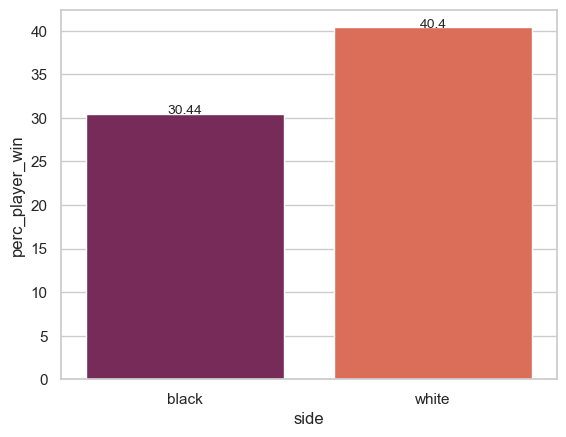

In [26]:
grouped_data = df.groupby("side").agg({'perc_player_win':'mean'})
ax = sns.barplot(x=grouped_data.index, y='perc_player_win', data=grouped_data, palette="rocket")

# Display values of the bar graph
for i, v in enumerate(grouped_data['perc_player_win']):
    ax.text(i, v+0.01, str(round(v,2)), ha='center', fontsize=10)

plt.show()

Through this visualization, it can be seen and observed that white has an apparent 10% starting advantage against black based on the dataset means for black win percentage and white win percentage across all openings.

Let's create a new column in our dataset that represents the openings without the variations, meaning, only the first basic moves in the opening (the first 2-3 moves for white and black).

In [27]:
#Removing the variation, as the first two moves make up the statistical evidence for wins
def get_opening_move(move):
    temp = str(move).split(',')
    return temp[0].strip()

In [28]:
#Create new column
df['opening_move'] = df['opening_name'].apply(lambda x : get_opening_move(x))
df.head()

,opening_name,side,num_games,ECO,last_played_date,perf_rating,avg_player,perc_player_win,perc_draw,pec_opponent_win,...,move3w,move3b,move4w,move4b,perc_white_win,perc_black_win,white_odds,white_wins,black_wins,opening_move
0,"Alekhine Defense, Balogh Variation",white,692,B03,6/22/2018,2247,2225,40.8,24.3,35.0,...,d4,d6,Bc4,NaN,40.8,35.0,1.165714,282.336,242.200,Alekhine Defense
1,"Alekhine Defense, Brooklyn Variation",black,228,B02,6/27/2018,2145,2193,29.8,22.4,47.8,...,NaN,NaN,NaN,NaN,47.8,29.8,1.604027,108.984,67.944,Alekhine Defense
2,"Alekhine Defense, Exchange Variation",white,6485,B03,7/6/2018,2244,2194,40.8,27.7,31.5,...,d4,d6,c4,Nb6,40.8,31.5,1.295238,2645.880,2042.775,Alekhine Defense
3,"Alekhine Defense, Four Pawns Attack",white,881,B03,6/20/2018,2187,2130,39.7,23.2,37.1,...,d4,d6,c4,Nb6,39.7,37.1,1.070081,349.757,326.851,Alekhine Defense
4,"Alekhine Defense, Four Pawns Attack, Fianchett...",black,259,B03,5/20/2018,2122,2178,37.8,21.2,40.9,...,d4,d6,c4,Nb6,40.9,37.8,1.082011,105.931,97.902,Alekhine Defense


<font size="5">**RESULTS**</font>

There we go! We have created column 19, "opening_move".

Now let's create a visualization of the top 10 openings to get a sense of what we're working with.

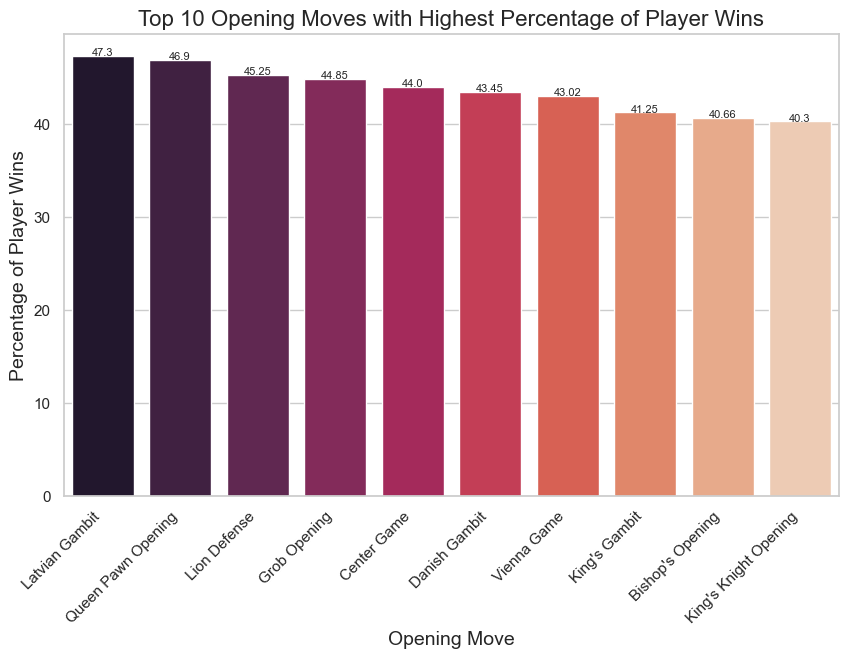

In [29]:
#Thanks to https://seaborn.pydata.org/tutorial/categorical.html and all of the documentation/tutorials

# create result


result = df.groupby("opening_move").agg({'perc_player_win':'mean'}).sort_values('perc_player_win', ascending=False).head(10)

# Create a bar plot 
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=result.index, y="perc_player_win", data=result, ax=ax, palette="rocket")

# Add labels to bars // thank you youtube this took me forever
for i, v in enumerate(result['perc_player_win']): 
    ax.text(i, v, round(v,2), horizontalalignment='center', fontsize=8)

# Add x-axis and y-axis labels
ax.set_xlabel("Opening Move", fontsize=14)
ax.set_ylabel("Percentage of Player Wins", fontsize=14)

# Set the title of the plot
ax.set_title("Top 10 Opening Moves with Highest Percentage of Player Wins", fontsize=16)

# Rotate x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

Great! We now have the top 10 opening moves with the highest player win percentage according to the dataset. 

Every single one of these openings is unique, composed of different sets of opening moves. In the game of chess, every move, every square you cut off with your pieces, and every positional move is pivotal to the game and the odds you have at winning it, making this data so important to the realm of chess and chess analyzation. 

Let's take a deeper look into the Queen Pawn Opening (Referred to usually as Queen's Pawn Opening).

This opening starts by moving the white pawn in front of your queen two squares forward to position d4. 

*Squares on a chess board can be identified by the row and column they are in, ranging from a-h and then 1-8, corresponding wherever they meet. For example, if a piece was in row 4 and column h, the piece would be on square h4.*

Let's determine what the next best possible move is based on the amount of white wins following the move d4.



In [30]:
#Creating data analyzation function

d4 = df[df['move1w']=='d4'].groupby('move2w').agg({'num_games': np.sum, 'white_wins' : np.sum, 'black_wins':np.sum})

d4['white_odds'] = d4['white_wins'] / d4['black_wins']

d4 = d4.sort_values('white_odds', ascending=False).head(5)
d4

,num_games,white_wins,black_wins,white_odds
move2w,,,,
dxe5,329,164.171,97.055,1.691525
d5,12065,5557.771,3367.844,1.650246
g3,11450,4731.300,3089.941,1.531194
c4,994397,388212.124,266743.835,1.455374
Bf4,8177,3389.943,2439.949,1.389350


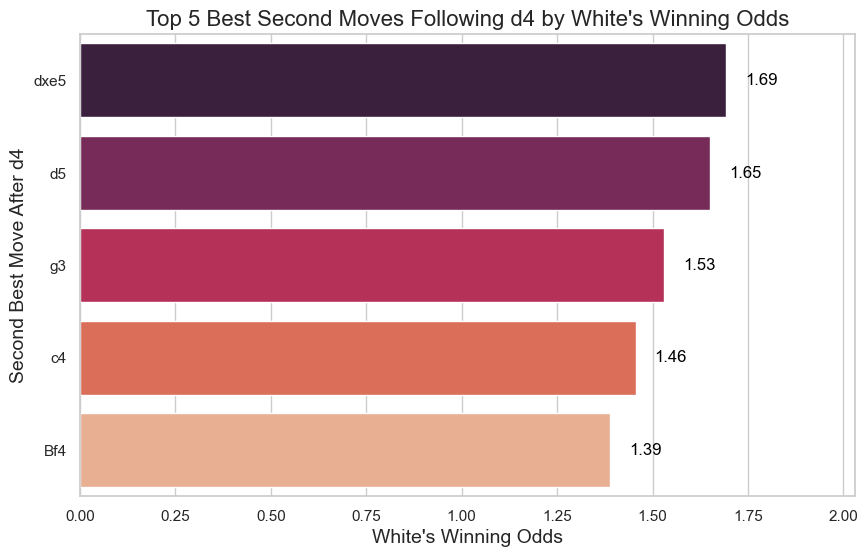

In [31]:
#create result
result = d4.sort_values('white_odds', ascending=False)

# Create a horizontal bar plot 
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="white_odds", y=result.index, data=result, ax=ax, palette="rocket")

# Add value labels to the bars // format text
for i, v in enumerate(result['white_odds']):
    ax.text(v+0.05, i, f"{v:.2f}", color='black', fontsize=12, va='center')

# Set the x-axis and y-axis labels and limits
ax.set_xlabel("White's Winning Odds", fontsize=14)
ax.set_ylabel("Second Best Move After d4", fontsize=14)
ax.set_xlim([0, max(result['white_odds']) * 1.2])

# Set the title of the plot
ax.set_title("Top 5 Best Second Moves Following d4 by White's Winning Odds", fontsize=16)

plt.show()


There we go! We now have a visualization of white's winning odds based on the second best move after d4.

Although black's first move may vary, the basic opening moves for white should still stay the same. 

The following moves, dxe5, d5, g3, and Bf4, are statistically and positionally strong for the following reasons:

dxe5: This move captures the black pawn on e5 and opens up the f1-a6 diagonal for the bishop. It's statistically strong because it gains material, but also positionally strong because it controls the center and puts pressure on the black pieces.

d5: This move also aims to control the center, but in a different way. By pushing the pawn to d5, white creates a strong pawn chain that restricts black's pieces and opens up space for white's pieces. It's positionally strong because it strengthens the central pawn structure and prepares for piece development.

g3: This move is a preparatory move that aims to develop the bishop to g2, where it will have a strong diagonal to control the center and put pressure on black's position. It's positionally strong because it prepares for future piece development and creates a solid pawn structure.

Bf4: This move develops the bishop to an active square where it controls the center and puts pressure on the black position. It's positionally strong because it develops a piece, controls the center, and puts pressure on black's pieces.

<font size="5">**Let's take a look at the black side now, do they have any chance of having an advantage following the move d4?**</font>

We will now look at the same graph, but from the perspective of the black side!

In [32]:
#create new outline for visualization
d4 = df[df['move1w'] == 'd4'].groupby('move2b').agg({'num_games': np.sum, 'white_wins': np.sum, 'black_wins': np.sum})

d4['black_odds'] = d4['black_wins'] / d4['white_wins']

d4 = d4.sort_values('black_odds', ascending=False).head(5)
d4

,num_games,white_wins,black_wins,black_odds
move2b,,,,
d5,196,48.020,117.012,2.436735
Na6,113,36.047,43.957,1.219436
dxe4,1019,409.925,420.097,1.024814
b6,6675,2333.847,2308.113,0.988974
b5,726,283.140,238.128,0.841026


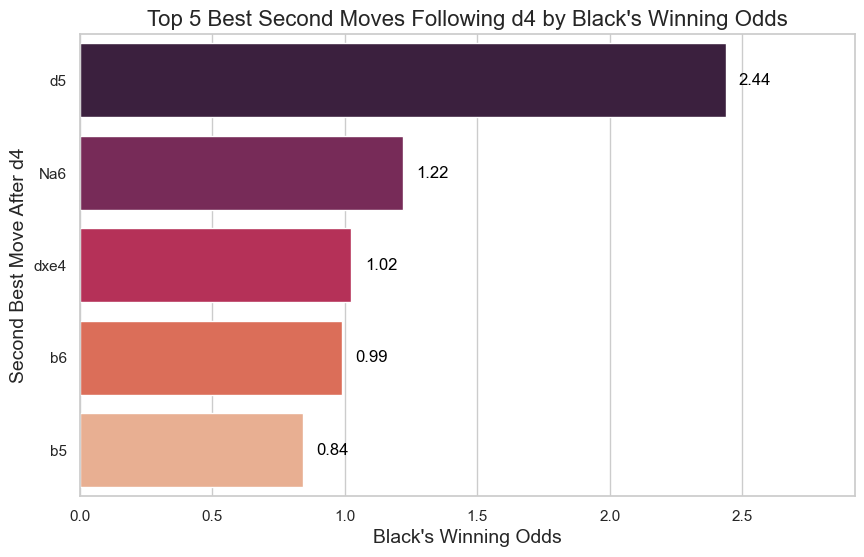

In [33]:
result = d4.sort_values('black_odds', ascending=False)

# Create a horizontal bar plot 
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="black_odds", y=result.index, data=result, ax=ax, palette="rocket")

# Add value labels to the bars // format text
for i, v in enumerate(result['black_odds']):
    ax.text(v+0.05, i, f"{v:.2f}", color='black', fontsize=12, va='center')

# Set the x-axis and y-axis labels and limits
ax.set_xlabel("Black's Winning Odds", fontsize=14)
ax.set_ylabel("Second Best Move After d4", fontsize=14)
ax.set_xlim([0, max(result['black_odds']) * 1.2])

# Set the title of the plot
ax.set_title("Top 5 Best Second Moves Following d4 by Black's Winning Odds", fontsize=16)

plt.show()


<font size="5">**Results**</font>

There we go, it seems that the most effective move is to match the pawn on d5, giving black an increasing advantagae during the opening play as they take over the center.

However, the other moves automatically give white a slight inherent advantage, meaning that the even the slightest mistake during this opening can punish you in the later stages of the game.


<font size="5">**So why does it all matter?**</font>

In [34]:
# First, let's change the dataframe back to df instead of d4

df = d4

<AxesSubplot:xlabel='perf_rating', ylabel='white_odds'>

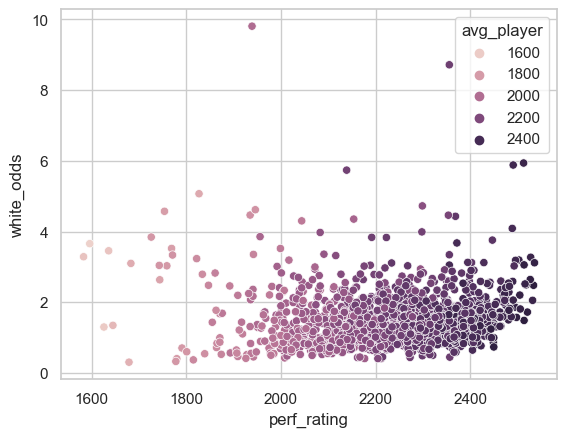

In [35]:
df = pd.read_csv('high_elo_opening.csv') #had to reset daataframe and reread file.
sns.scatterplot(x='perf_rating', y='white_odds', hue='avg_player', data=df)

<font size="5">**This is why it matters:**</font>

This scatterplot is a great example of the results from all of the visualizations and analyzations we have discussed this far. 

The visualization contains performance rating (how well a player has played over a set number of games) and the white odds, showing direct correlation. This is through the fact that when the player has higher odds (typically above 1.5) they perform at a much higher level than they are due to the openings they play from the very start.

In addition to this, only the lower rated players are seen in the scatterplot not benefitting and performing at a higher level even when the odds were in their favor. This proves the consistency and legitimacy of the correlation, as it shows that there is some room for error and it does not guarantee automatic better performance, but usually does.

Lastly, whenever the white odds are below 1, then black has the advantage, which is why you see so little data points at the place where 1.0 odds would be, since nobody is performing at a high level when they are losing the match.

<font size="5">**FINAL OBSERVATIONS**</font>

For my final observations, I simply want to look at the very first visualization we produced.

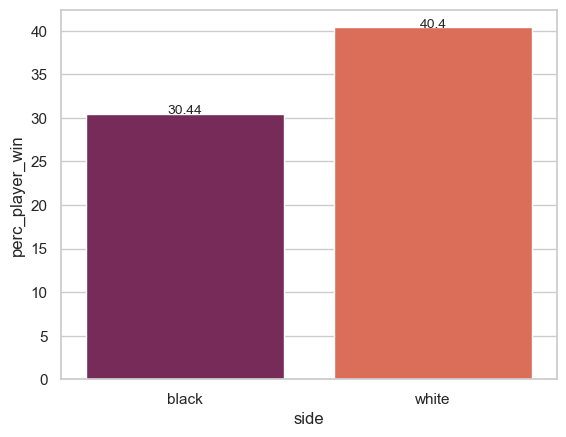

This is where it all started, where we began to answer the question, can this be different? Can black win more of the time based off of analyzing the best moves following certain chess openings? 

The answer was a definitive **Yes**.

We observed that certain openings, sequential moves, changing odds, win percentages, and games played all determined that black could obtain an inherent or starting advantage during the opening as well.

<font size="5">**FINAL THOUGHTS**</font>

Throughout the entire process of this data story and the research and exploration it entailed, the main point has always been to answer questions about the advantages openings give, no matter the inherent advantages.

It began with the rough draft, scraping together visualizations that made sense to the story, how certain features of the game correlated with one another. Through the test audience and user feedback, it was easy to make adjustments that made the data story more understandable and cohesive; with suggestions that helped me improve my narrative the overall concept came together very well. 

It is obvious that through the data there is everchanging odds in chess, but through the openings we determined (as stated above in final observations) that despite white being typically stronger, it can be beaten. However, I wish there was more revision and depth into the specific moves for the top 10 openings. This data story was made in order to look at the broad view of chess openings, odds, and more, but diving deeper into the specifics of say the Queen's Pawn Opening would have been interesting and engaging had it been relevant enough to include into the big picture. In addition to this, I wish I could have expanded on the type of visualizations I used, however, barplots and scatterplots were the easiest to show relationships between certain variables in my data story.

In regards to the data story overlooking or minimalizing other aspects, it is a factor that played a role in the data story. Variables such as opponents playing completely awful moves (that allow checkmate in the first few moves) and number of games played at certain openings played a role in how the data was perceived slightly, but did not change the overall outcome and did not affect the questions we were attempting to answer.

To finish, discussing the potential harm or misleading of certain groups of people is important. This chess dataset was taken from high-elo (high rated) games, meaning all of the players in these data sets are typically playing the correct moves in the openings. However, beginner chess players might not understand these moves and the theory behind them, potentially causing harm or confusion to their gameplay and how they approach the game!

As the chess world continues to expand rapidly, more and more technology and artificial intelligence will help us truly master the game of chess, but for now, learning the openings and analyzing inherent advantages the basic way, through data, is the most effective and understandable answer for players (or non-players) of all levels.